In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import xarray as xr
import xesmf as xe

In [2]:
import matplotlib.pyplot as plt

In [3]:
ds = xr.open_dataset('nws_precip_1day_20180914_conus.nc')

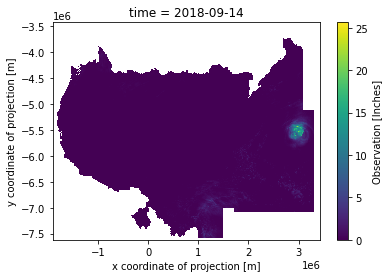

In [4]:
ds.observation.plot()

In [5]:
ds_imerg = xr.open_dataset('/home/manmeet/Documents/work/alka/files_Alka/imerg/3B-DAY.MS.MRG.3IMERG.20180910-S000000-E235959.V06.nc4')

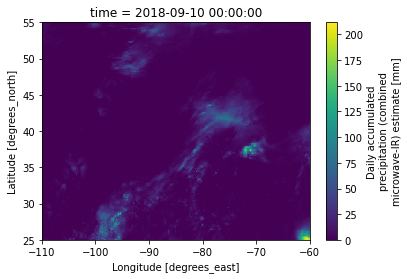

In [6]:
ds_imerg.precipitationCal.T.sel(lat=slice(25,55)).sel(lon=slice(-110, -60)).plot()

In [8]:
from pyproj import Proj
p2 = Proj('+proj=stere +lat_0=90 +lat_ts=60 +lon_0=-105 +x_0=0 +y_0=0 +a=6371200 +b=6371200 +units=m +no_defs')

In [9]:
points = []
values = []
for i_x in range(ds.x.values.shape[0]):
    for j_y in range(ds.y.values.shape[0]):
        points.append([p2(ds.x.values[i_x],ds.y.values[j_y],inverse=True)[0],p2(ds.x.values[i_x],ds.y.values[j_y],inverse=True)[1]])
        values.append(ds.observation.values[j_y, i_x])

In [13]:
ds_imerg_ = ds_imerg.sel(lat=slice(25,55)).sel(lon=slice(-110, -60))
lat_ = ds_imerg_.lat.values
lon_ = ds_imerg_.lon.values
grid_x, grid_y = np.meshgrid(lon_, lat_)

In [14]:
from scipy.interpolate import griddata

In [15]:
grid_z0 = griddata(np.array(points), np.array(values), (grid_x, grid_y), method='nearest')

In [16]:
ds_imerg_['ahps_observation'] = (('lat', 'lon'), grid_z0)

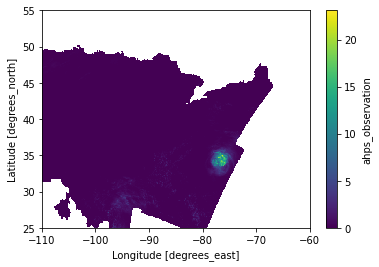

In [17]:
ds_imerg_.ahps_observation.plot()